In [190]:
%load_ext autoreload
%autoreload 2

import os

subj = "phase2/Subj24"

UNIQUE_VALUES_THRESHOLD = 200

exp = "exp_reduced_flow"
os.makedirs(f"{subj}/{exp}", exist_ok = True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [191]:
import typing

import mne
import numpy
import pandas
import IPython.display
import sklearn.metrics
import sklearn.preprocessing
import sklearn.decomposition
import matplotlib.pyplot as plt

import SDA.topology
import SDA.analytics
import SDA.clustquality
import SDA.stageprocess

### Data

In [192]:
epochs = mne.read_epochs(f"{subj}/src/epochs_filt_rr-epo.fif").drop_channels(ch_names = [ 'IVEOG', 'IHEOG' ])
N_STAGES = int(numpy.loadtxt(f"{subj}/src/n_stages.txt"))
print('Stages: ', N_STAGES)

epochs.average().plot_joint().savefig(f"{subj}/{exp}/eeg.svg")
data = epochs.get_data(copy = True)
print(data.shape)

FileNotFoundError: File does not exist: "d:\HSE\year-3\HSE\CourseProject\phase2\Subj24\src\epochs_filt_rr-epo.fif"

### Features

In [ ]:
per_channel_folder = f"{subj}/{exp}/features/per_channel"
os.makedirs(per_channel_folder, exist_ok = True)
per_channel_extractor = SDA.topology.PerChannelFeatureExtractor(n_jobs = -1, folder = per_channel_folder, reduced = True)
per_channel_features = per_channel_extractor.extract(data)

dissimilarity_folder = f"{subj}/{exp}/features/dissimilarity"
os.makedirs(dissimilarity_folder, exist_ok = True)
dissimilarity_extractor = SDA.topology.DissimilarityFeatureExtractor(n_jobs = -1, folder = dissimilarity_folder, reduced = True)
dissimilarity_features = dissimilarity_extractor.extract(data)

overall_folder = f"{subj}/{exp}/features/overall"
os.makedirs(overall_folder, exist_ok = True)
overall_extractor = SDA.topology.OverallFeatureExtractor(n_jobs = -1, folder = overall_folder, reduced = True)
overall_features = overall_extractor.extract(data)

all_features = pandas.concat([
    per_channel_features,
    dissimilarity_features,
    overall_features
], axis = 1)

all_features.to_feather(f"{subj}/{exp}/features/all_features.feather")
display(all_features)

Got features from phase2/Subj23/exp_reduced_flow/features/per_channel/features.feather
Got features from phase2/Subj23/exp_reduced_flow/features/overall/features.feather


,channel-0 landscape dim-1 max,channel-0 landscape dim-1 mean,channel-0 landscape dim-1 std,channel-0 landscape dim-1 sum,channel-0 landscape dim-1 norm-1,channel-0 landscape dim-1 norm-2,channel-0 landscape dim-2 max,channel-0 landscape dim-2 mean,channel-0 landscape dim-2 std,channel-0 landscape dim-2 sum,...,overall bd2 dim-2 std,overall bd2 dim-2 sum,overall bd2 dim-2 norm-1,overall bd2 dim-2 norm-2,overall bd2 dim-3 max,overall bd2 dim-3 mean,overall bd2 dim-3 std,overall bd2 dim-3 sum,overall bd2 dim-3 norm-1,overall bd2 dim-3 norm-2
0,1.723790e-06,6.800116e-08,2.728568e-07,0.000007,0.000007,2.812027e-06,4.098784e-07,5.475996e-09,4.289158e-08,5.475996e-07,...,0.000002,0.003802,0.003802,0.000472,0.000067,0.000063,1.908274e-06,0.003129,0.003129,0.000443
1,8.289217e-07,3.431737e-08,1.411093e-07,0.000003,0.000003,1.452223e-06,2.243119e-07,4.597729e-09,2.925842e-08,4.597729e-07,...,0.000002,0.001864,0.001864,0.000299,0.000052,0.000049,1.404015e-06,0.000642,0.000642,0.000178
2,1.205962e-06,4.901027e-08,1.886912e-07,0.000005,0.000005,1.949523e-06,3.327778e-07,4.387540e-09,3.464779e-08,4.387540e-07,...,0.000004,0.000886,0.000886,0.000204,0.000050,0.000047,1.794083e-06,0.000142,0.000142,0.000082
3,8.016047e-07,2.966629e-08,1.275695e-07,0.000003,0.000003,1.309736e-06,3.888595e-07,8.376219e-09,5.175314e-08,8.376219e-07,...,0.000003,0.003064,0.003064,0.000407,0.000061,0.000057,2.500407e-06,0.001544,0.001544,0.000297
4,7.545507e-07,2.275088e-08,1.122279e-07,0.000002,0.000002,1.145108e-06,1.017406e-07,2.877395e-09,1.454474e-08,2.877395e-07,...,0.000003,0.000832,0.000832,0.000208,0.000059,0.000054,3.814423e-06,0.000161,0.000161,0.000093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,7.446834e-07,1.378783e-08,8.576720e-08,0.000001,0.000001,8.686839e-07,6.602653e-08,6.602653e-10,6.569557e-09,6.602653e-08,...,0.000002,0.001746,0.001746,0.000252,0.000040,0.000038,1.356269e-06,0.000532,0.000532,0.000142
1638,4.647050e-07,1.035728e-08,6.074937e-08,0.000001,0.000001,6.162596e-07,2.153337e-07,2.153337e-09,2.142544e-08,2.153337e-07,...,0.000002,0.001642,0.001642,0.000235,0.000037,0.000035,1.723442e-06,0.000975,0.000975,0.000185
1639,1.537622e-06,4.711165e-08,2.224067e-07,0.000005,0.000005,2.273417e-06,1.355884e-07,1.552066e-09,1.361184e-08,1.552066e-07,...,0.000003,0.000446,0.000446,0.000116,0.000027,0.000027,0.000000e+00,0.000027,0.000027,0.000027
1640,8.488640e-07,2.308031e-08,1.182054e-07,0.000002,0.000002,1.204376e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000001,0.000783,0.000783,0.000151,0.000031,0.000030,4.587267e-07,0.000209,0.000209,0.000079


In [ ]:
features = sklearn.preprocessing.StandardScaler().fit_transform(all_features)
features = pandas.DataFrame(features, columns = all_features.columns)

features.to_feather(f"{subj}/{exp}/features/features.feather")
display(features)

numpy.save(f"{subj}/{exp}/features/features.npy", features.to_numpy())

,channel-0 landscape dim-1 max,channel-0 landscape dim-1 mean,channel-0 landscape dim-1 std,channel-0 landscape dim-1 sum,channel-0 landscape dim-1 norm-1,channel-0 landscape dim-1 norm-2,channel-0 landscape dim-2 max,channel-0 landscape dim-2 mean,channel-0 landscape dim-2 std,channel-0 landscape dim-2 sum,...,overall bd2 dim-2 std,overall bd2 dim-2 sum,overall bd2 dim-2 norm-1,overall bd2 dim-2 norm-2,overall bd2 dim-3 max,overall bd2 dim-3 mean,overall bd2 dim-3 std,overall bd2 dim-3 sum,overall bd2 dim-3 norm-1,overall bd2 dim-3 norm-2
0,1.231375,1.179806,1.235106,1.179806,1.179806,1.230680,2.122875,1.557457,1.907826,1.557457,...,-0.426704,6.685771,6.685771,5.430474,1.365658,1.267645,0.307335,12.809434,12.809434,7.015314
1,-0.483557,-0.073847,-0.227076,-0.073847,-0.073847,-0.218064,0.632951,1.146541,0.937672,1.146541,...,-0.599552,2.386789,2.386789,2.219718,0.637883,0.595259,0.059464,2.025075,2.025075,1.982817
2,0.239005,0.472998,0.301006,0.472998,0.472998,0.311762,1.503830,1.048199,1.321188,1.048199,...,0.158909,0.215859,0.215859,0.462069,0.512861,0.491285,0.251204,-0.142588,-0.142588,0.155887
3,-0.535907,-0.246952,-0.377345,-0.246952,-0.246952,-0.369872,1.954113,2.914388,2.538427,2.914388,...,-0.120953,5.049315,5.049315,4.218882,1.030296,0.991859,0.598402,5.934293,5.934293,4.250154
4,-0.626082,-0.504332,-0.547612,-0.504332,-0.504332,-0.545268,-0.351181,0.341646,-0.109372,0.341646,...,-0.262977,0.096953,0.096953,0.543719,0.966590,0.821912,1.244315,-0.058142,-0.058142,0.373059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,-0.644992,-0.837921,-0.841283,-0.837921,-0.837921,-0.839771,-0.637931,-0.695686,-0.676897,-0.695686,...,-0.576247,2.123566,2.123566,1.358933,0.050210,0.015513,0.035994,1.548171,1.548171,1.300955
1638,-1.181544,-0.965600,-1.118940,-0.965600,-0.965600,-1.108706,0.560865,0.002880,0.380267,0.002880,...,-0.585232,1.892474,1.892474,1.035640,-0.109484,-0.146072,0.216480,3.469510,3.469510,2.104189
1639,0.874601,0.402334,0.675193,0.402334,0.402334,0.656841,-0.079415,-0.278437,-0.175759,-0.278437,...,-0.180717,-0.759166,-0.759166,-1.171363,-0.591879,-0.539008,-0.630689,-0.640822,-0.640822,-0.889025
1640,-0.445339,-0.492071,-0.481272,-0.492071,-0.492071,-0.482123,-1.168062,-1.004605,-1.144396,-1.004605,...,-0.858735,-0.012544,-0.012544,-0.523426,-0.413862,-0.395994,-0.405199,0.149661,0.149661,0.100920


### Feature selection

In [ ]:
os.makedirs(f"{subj}/{exp}/qsda", exist_ok = True)
qsda = SDA.QSDA(
    n_jobs = 1,
    qsda_n_jobs = 15,
    scores_folder = f"{subj}/{exp}/qsda",

    threshold = 1150,
    min_unique_values = UNIQUE_VALUES_THRESHOLD
)
best_features, scores = qsda.select(features)

best_features.to_feather(f"{subj}/{exp}/qsda/best_features.feather")
numpy.save(f"{subj}/{exp}/qsda/best_features.npy", features.to_numpy())
display(best_features)
display(scores)

Using threshold 0.38


,channel-0 silhouette-1 dim-2 mean,channel-0 silhouette-1 dim-2 sum,channel-0 silhouette-1 dim-2 norm-1,channel-0 silhouette-2 dim-2 mean,channel-0 silhouette-2 dim-2 sum,channel-0 silhouette-2 dim-2 norm-1,channel-0 amplitude-silhouette-1-1 dim-2,channel-0 amplitude-silhouette-1-2 dim-2,channel-0 bd2 all sum,channel-0 bd2 all norm-1,...,overall life dim-2 sum,overall life dim-2 norm-1,overall life dim-3 sum,overall life dim-3 norm-1,overall bd2 all max,overall bd2 dim-1 norm-2,overall bd2 dim-2 sum,overall bd2 dim-2 norm-1,overall bd2 dim-3 sum,overall bd2 dim-3 norm-1
0,0.592419,0.592419,0.592419,0.865316,0.865316,0.865316,0.592419,0.865316,3.556946,3.556946,...,8.376905,8.376905,12.982932,12.982932,1.424170,2.662994,6.685771,6.685771,12.809434,12.809434
1,0.121474,0.121474,0.121474,0.189668,0.189668,0.189668,0.121474,0.189668,1.922679,1.922679,...,1.454891,1.454891,1.818413,1.818413,0.083005,1.186066,2.386789,2.386789,2.025075,2.025075
2,0.616859,0.616859,0.616859,0.912188,0.912188,0.912188,0.616859,0.912188,1.807251,1.807251,...,-0.196638,-0.196638,-0.373133,-0.373133,0.471506,0.815702,0.215859,0.215859,-0.142588,-0.142588
3,1.029458,1.029458,1.029458,0.982721,0.982721,0.982721,1.029458,0.982721,3.304868,3.304868,...,4.318798,4.318798,6.296791,6.296791,0.806156,2.277887,5.049315,5.049315,5.934293,5.934293
4,-0.372710,-0.372710,-0.372710,-0.446759,-0.446759,-0.446759,-0.372710,-0.446759,2.079643,2.079643,...,-0.265834,-0.265834,0.082150,0.082150,0.688757,1.274262,0.096953,0.096953,-0.058142,-0.058142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,-0.538805,-0.538805,-0.538805,-0.577256,-0.577256,-0.577256,-0.538805,-0.577256,-0.160161,-0.160161,...,1.577589,1.577589,1.678001,1.678001,-0.999975,0.064873,2.123566,2.123566,1.548171,1.548171
1638,-0.248412,-0.248412,-0.248412,-0.252354,-0.252354,-0.252354,-0.248412,-0.252354,-0.599972,-0.599972,...,1.481069,1.481069,3.691286,3.691286,-1.294263,-1.121438,1.892474,1.892474,3.469510,3.469510
1639,0.059136,0.059136,0.059136,0.033919,0.033919,0.033919,0.059136,0.033919,-0.895159,-0.895159,...,-0.619185,-0.619185,-0.516886,-0.516886,-0.526009,-1.472785,-0.759166,-0.759166,-0.640822,-0.640822
1640,-0.732086,-0.732086,-0.732086,-0.710678,-0.710678,-0.710678,-0.732086,-0.710678,-1.182836,-1.182836,...,-0.308323,-0.308323,0.137691,0.137691,-1.600305,-1.466878,-0.012544,-0.012544,0.149661,0.149661


,name,score,mean,variance,unique_values,normalized_score
0,channel-0 landscape dim-1 max,0.271946,-1.730920e-16,1.0,1642,0.064327
1,channel-0 landscape dim-1 mean,0.678351,-1.038552e-16,1.0,1642,0.177267
2,channel-0 landscape dim-1 std,0.411591,-2.250196e-16,1.0,1642,0.103134
3,channel-0 landscape dim-1 sum,0.678351,-1.730920e-17,1.0,1642,0.177267
4,channel-0 landscape dim-1 norm-1,0.678351,-1.730920e-17,1.0,1642,0.177267
...,...,...,...,...,...,...
4167,overall bd2 dim-3 mean,0.499726,-2.336742e-16,1.0,1347,0.127627
4168,overall bd2 dim-3 std,0.786099,-1.298190e-17,1.0,1059,0.207210
4169,overall bd2 dim-3 sum,1.954787,-2.596380e-17,1.0,1347,0.531988
4170,overall bd2 dim-3 norm-1,1.954787,-2.596380e-17,1.0,1347,0.531988


### Results

#### Estimator

In [ ]:
def analyze(all_features: pandas.DataFrame, n_components: int, folder: str):
    folder = f"{subj}/{exp}/results/{folder}"
    os.makedirs(folder, exist_ok = True)

    # Scale features
    all_features = sklearn.preprocessing.StandardScaler().fit_transform(all_features)
    print(all_features.shape)
    numpy.save(f"{folder}/all_features.npy", all_features)
    numpy.savetxt(f"{folder}/all_features_shape.txt", all_features.shape)

    # PCA
    pca = sklearn.decomposition.PCA(n_components = n_components, svd_solver = "full", random_state = 42)
    pca_features = pca.fit_transform(all_features)
    print(pca_features.shape)
    numpy.save(f"{folder}/pca_features.npy", pca_features)
    numpy.savetxt(f"{folder}/pca_features_shape.txt", pca_features.shape)
    
    print('Explained variance', round(pca.explained_variance_ratio_.sum(), 2))
    print([ round(x, 3) for x in pca.explained_variance_ratio_ ])
    numpy.savetxt(f"{folder}/explained_variance.txt", [ pca.explained_variance_ratio_.sum() ])
    numpy.savetxt(f"{folder}/explained_variance_ratios.txt", pca.explained_variance_ratio_)

    # SDA
    sda = SDA.SDA(n_jobs = -1, scale = False, verbose = True)
    results, df_st_edges = sda.apply(pca_features)
    
    results.to_csv(f"{folder}/results.csv")
    df_st_edges.to_csv(f"{folder}/df_st_edges.csv")

    # Analyze
    best_results = SDA.analytics.best_results(results, key = 'Avg-Silh')
    best_results.to_csv(f"{folder}/best_results.csv")
    
    best_result = SDA.analytics.best_result(results, key = 'Avg-Silh', n_stages = N_STAGES)
    best_result_df = pandas.DataFrame([ best_result ])
    best_result_df.to_csv(f"{folder}/best_result.csv")
    display(best_result_df)
    
    best_edges = numpy.array(best_result['St_edges'])
    numpy.savetxt(f"{folder}/best_edges.txt", best_edges, fmt = "%d", newline = ' ')
    display(best_edges)

    stage_timing = SDA.analytics.stage_timing(best_edges, epochs)
    stage_timing.to_csv(f"{folder}/stage_timing.csv")
    display(stage_timing)
    
    SDA.analytics.plot_stats(pca_features, epochs, best_result, df_st_edges).savefig(f"{folder}/stats.svg")

#### Традиционные признаки

(1642, 341)
(1642, 15)
Explained variance 0.7
[0.267, 0.123, 0.062, 0.046, 0.035, 0.027, 0.024, 0.022, 0.017, 0.016, 0.014, 0.013, 0.013, 0.012, 0.012]
Applying to 1642 samples with 15 features each


stage 2: 100%|██████████| 672/672 [00:15<00:00, 42.02it/s]


,St_len_min,K_nb_max,N_cl_max,Cl_cen,Len_min,St_edges,N_stages,Longest_stage,Shortest_stage,Avg_stage_length,Ward_dist,Cen_dist,Silh,Cal-Har,Dav-Bold,Avg-Silh,Avg-Cal-Har,Avg-Dav-Bold
0,40,40,20,Median,40,"[0, 127, 423, 535, 865, 1027, 1132, 1642]",7,510,105,234.571429,15283.602678,11.934966,-0.001581,114.918591,3.336805,0.162879,99.740144,2.507993


array([   0,  127,  423,  535,  865, 1027, 1132, 1642])

,0,1,2,3,4,5,6
"Start-end time, sec","(5.5, 133.5)","(134.5, 448.5)","(449.5, 565.5)","(566.5, 913.5)","(914.5, 1086.5)","(1087.5, 1200.5)","(1201.5, 1755.5)"
"Time length, sec",128.0,314.0,116.0,347.0,172.0,113.0,554.0
Number of epochs,127,296,112,330,162,105,510


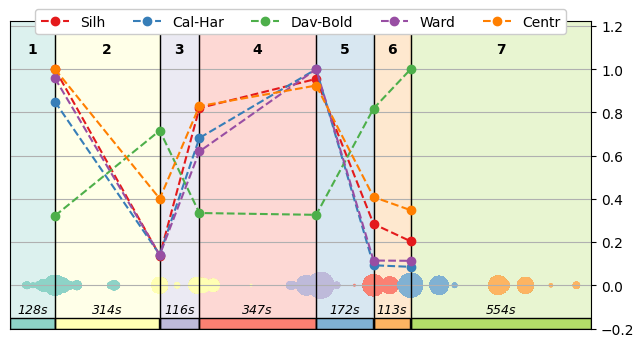

In [ ]:
def read_traditional():
    df_ft_psd_loc_db = pandas.read_feather(f'{subj}/src/df_ft_psd_loc_db.feather')
    df_ft_psd_ind_loc_log = pandas.read_feather(f'{subj}/src/df_ft_psd_ind_loc_log.feather')
    df_ft_coh_ind_loc = pandas.read_feather(f'{subj}/src/df_ft_coh_ind_loc.feather')
    df_ft_plv_ind_loc = pandas.read_feather(f'{subj}/src/df_ft_plv_ind_loc.feather')

    result =  pandas.concat([
        df_ft_psd_loc_db,
        df_ft_psd_ind_loc_log,
        df_ft_coh_ind_loc,
        df_ft_plv_ind_loc
    ], axis = 1)

    if subj == "Subj2":
        result = result[:-2]
    return result

analyze(read_traditional(), 15, "traditional")

#### Топологические признаки + QSDA + PCA

(1642, 1151)
(1642, 15)
Explained variance 0.7
[0.229, 0.092, 0.045, 0.039, 0.038, 0.035, 0.033, 0.032, 0.031, 0.029, 0.025, 0.022, 0.02, 0.019, 0.016]
Applying to 1642 samples with 15 features each


stage 2: 100%|██████████| 672/672 [00:16<00:00, 40.89it/s]


,St_len_min,K_nb_max,N_cl_max,Cl_cen,Len_min,St_edges,N_stages,Longest_stage,Shortest_stage,Avg_stage_length,Ward_dist,Cen_dist,Silh,Cal-Har,Dav-Bold,Avg-Silh,Avg-Cal-Har,Avg-Dav-Bold
0,60,40,20,Median,40,"[0, 98, 318, 534, 870, 992, 1142, 1642]",7,500,98,234.571429,21519.045527,14.249782,-0.045718,46.64936,5.039473,0.176893,31.472754,3.444546


array([   0,   98,  318,  534,  870,  992, 1142, 1642])

,0,1,2,3,4,5,6
"Start-end time, sec","(5.5, 104.5)","(105.5, 338.5)","(339.5, 564.5)","(565.5, 919.5)","(920.5, 1046.5)","(1047.5, 1210.5)","(1211.5, 1755.5)"
"Time length, sec",99.0,233.0,225.0,354.0,126.0,163.0,544.0
Number of epochs,98,220,216,336,122,150,500


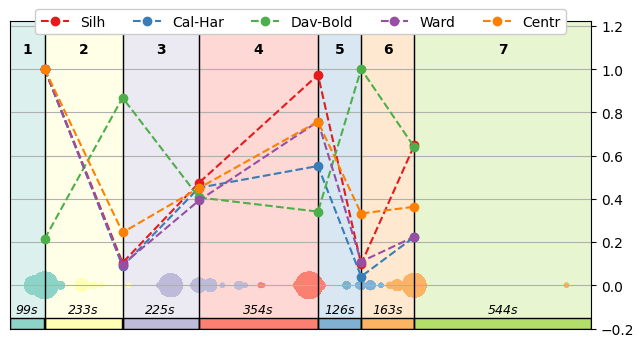

In [ ]:
analyze(best_features, 15, "best_topological")

#### Традиционные и топологические вместе + PCA

(1642, 1492)
(1642, 15)
Explained variance 0.64
[0.209, 0.09, 0.045, 0.037, 0.03, 0.029, 0.028, 0.027, 0.025, 0.023, 0.022, 0.02, 0.02, 0.016, 0.016]
Applying to 1642 samples with 15 features each


stage 2: 100%|██████████| 672/672 [00:16<00:00, 41.57it/s]


,St_len_min,K_nb_max,N_cl_max,Cl_cen,Len_min,St_edges,N_stages,Longest_stage,Shortest_stage,Avg_stage_length,Ward_dist,Cen_dist,Silh,Cal-Har,Dav-Bold,Avg-Silh,Avg-Cal-Har,Avg-Dav-Bold
0,40,50,10,Mode,40,"[0, 97, 202, 566, 845, 1084, 1127, 1642]",7,515,43,234.571429,29610.986504,19.099889,-0.025403,62.888734,3.727154,0.208902,39.607561,2.673977


array([   0,   97,  202,  566,  845, 1084, 1127, 1642])

,0,1,2,3,4,5,6
"Start-end time, sec","(5.5, 103.5)","(104.5, 211.5)","(212.5, 602.5)","(603.5, 893.5)","(894.5, 1148.5)","(1149.5, 1194.5)","(1195.5, 1755.5)"
"Time length, sec",98.0,107.0,390.0,290.0,254.0,45.0,560.0
Number of epochs,97,105,364,279,239,43,515


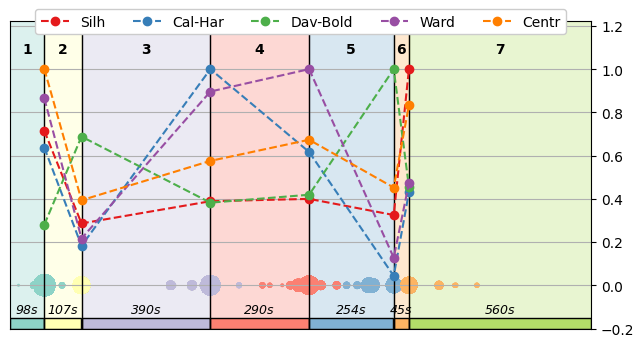

In [ ]:
combined_features = pandas.concat([ read_traditional(), best_features ], axis = 1)
analyze(combined_features, 15, "combined")

### Information value

In [ ]:
result_edges = numpy.loadtxt(f"{subj}/{exp}/results/best_topological/best_edges.txt").astype(numpy.int32)
print(result_edges)

if os.path.exists(f"{subj}/{exp}/IV/IV.csv"):
    ivs = pandas.read_csv(f"{subj}/{exp}/IV/IV.csv")
else:
    _, labels = SDA.stageprocess.form_stage_bands(result_edges)
    ivs = SDA.analytics.IV.calc_IV_clust(features, labels)

    os.makedirs(f"{subj}/{exp}/IV", exist_ok = True)
    ivs.to_csv(f"{subj}/{exp}/IV/IV.csv", index = False)

ivs["normalized_iv"] = sklearn.preprocessing.MinMaxScaler().fit_transform(ivs[["IV"]])
display(ivs)

[   0   98  318  534  870  992 1142 1642]


IV: 100%|██████████| 4172/4172 [00:14<00:00, 280.80it/s]


,Feature,IV,IVs,normalized_iv
0,channel-0 landscape dim-1 max,0.133004,"[0.23994582797888275, 0.056868002291508776, 0....",0.036658
1,channel-0 landscape dim-1 mean,0.117844,"[0.23995405987734764, 0.09561481254850149, 0.0...",0.030771
2,channel-0 landscape dim-1 std,0.120064,"[0.16238921514218319, 0.08010769061250657, 0.0...",0.031633
3,channel-0 landscape dim-1 sum,0.117844,"[0.23995405987734764, 0.09561481254850149, 0.0...",0.030771
4,channel-0 landscape dim-1 norm-1,0.117844,"[0.23995405987734764, 0.09561481254850149, 0.0...",0.030771
...,...,...,...,...
4167,overall bd2 dim-3 mean,0.411120,"[1.1115745656746796, 0.14920145526632594, 0.25...",0.144665
4168,overall bd2 dim-3 std,0.131702,"[0.19660357997901112, 0.03818911604934912, 0.2...",0.036153
4169,overall bd2 dim-3 sum,0.262218,"[1.009553068731896, 0.06877476883789872, 0.208...",0.086839
4170,overall bd2 dim-3 norm-1,0.262218,"[1.009553068731896, 0.06877476883789872, 0.208...",0.086839


In [ ]:
iv_qsda_scores = scores.join(ivs, lsuffix = "name", rsuffix = "Feature")
iv_qsda_scores = iv_qsda_scores[["name", "unique_values", "score", "normalized_score", "IV", "normalized_iv"]]

iv_qsda_scores["score"] = iv_qsda_scores["score"] * (iv_qsda_scores["unique_values"] >= UNIQUE_VALUES_THRESHOLD)
iv_qsda_scores["normalized_score"] = iv_qsda_scores["normalized_score"] * (iv_qsda_scores["unique_values"] >= UNIQUE_VALUES_THRESHOLD)

iv_qsda_scores = iv_qsda_scores.sort_values(by = 'score', ascending = False)
iv_qsda_scores["QSDA_IDX"] = numpy.arange(1, iv_qsda_scores.shape[0] + 1)

iv_qsda_scores = iv_qsda_scores.sort_values(by = 'IV', ascending = False)
iv_qsda_scores["IV_IDX"] = numpy.arange(1, iv_qsda_scores.shape[0] + 1)

iv_qsda_scores["IDX_DIFF"] = iv_qsda_scores["QSDA_IDX"] - iv_qsda_scores["IV_IDX"]

iv_qsda_scores = iv_qsda_scores.sort_index()
display(iv_qsda_scores)

,name,unique_values,score,normalized_score,IV,normalized_iv,QSDA_IDX,IV_IDX,IDX_DIFF
0,channel-0 landscape dim-1 max,1642,0.271946,0.064327,0.133004,0.036658,4025,2711,1314
1,channel-0 landscape dim-1 mean,1642,0.678351,0.177267,0.117844,0.030771,2963,2992,-29
2,channel-0 landscape dim-1 std,1642,0.411591,0.103134,0.120064,0.031633,3743,2946,797
3,channel-0 landscape dim-1 sum,1642,0.678351,0.177267,0.117844,0.030771,2965,2990,-25
4,channel-0 landscape dim-1 norm-1,1642,0.678351,0.177267,0.117844,0.030771,2964,2993,-29
...,...,...,...,...,...,...,...,...,...
4167,overall bd2 dim-3 mean,1347,0.499726,0.127627,0.411120,0.144665,3494,576,2918
4168,overall bd2 dim-3 std,1059,0.786099,0.207210,0.131702,0.036153,2593,2729,-136
4169,overall bd2 dim-3 sum,1347,1.954787,0.531988,0.262218,0.086839,545,1197,-652
4170,overall bd2 dim-3 norm-1,1347,1.954787,0.531988,0.262218,0.086839,544,1198,-654


<Axes: >

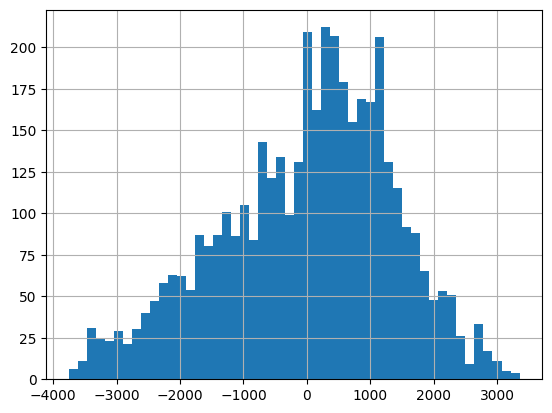

In [ ]:
iv_qsda_scores["IDX_DIFF"].hist(bins = 50)

In [ ]:
def vec_div(vec):
    mat1 = numpy.repeat(vec.reshape(-1, 1), repeats = len(vec), axis = 1)
    mat2 = numpy.repeat(vec.reshape(1, -1), repeats = len(vec), axis = 0)
    return numpy.sign(mat1 - mat2)

qsda = vec_div(iv_qsda_scores["score"].to_numpy())
iv = vec_div(iv_qsda_scores["IV"].to_numpy())

correct = ((qsda == iv).sum() - iv_qsda_scores.shape[0]) / 2
incorrect = ((qsda != iv).sum() - iv_qsda_scores.shape[0]) / 2

print(correct / 1e6, incorrect / 1e6)

5.389904 3.308716


In [ ]:
def sourceFilter(row):
    if row['Source'].startswith('dissim'):
        return 'dissim'
    return row['Source']

iv_qsda_scores[["Source", "Algorithm", "Dimension", "Stat"]] = iv_qsda_scores['name'].str.split(' ', expand = True)
iv_qsda_scores["Source"] = iv_qsda_scores.apply(sourceFilter, axis = 1)
iv_qsda_scores.to_csv(f"{subj}/{exp}/IV/iv_qsda_scores.csv", index = False)

In [ ]:
def SourceRenamer(initial: str) -> str:
    if initial == 'dissim':
        return 'Correlations analysis'
    if initial == 'overall':
        return 'Overall processing'
    ind = initial.find('-') + 1
    comp = int(initial[ind:])
    return f'Comp. {comp} (ch. {epochs.ch_names[comp]})'

def AlgorithmRenamer(row):
    return {
        'amplitude-betti-1':        'Betti amp. with p=1',
        'amplitude-betti-2':        'Betti amp. with p=2',

        'amplitude-bottleneck':     'Bottleneck amp.',
        'amplitude-wasserstein-1':  'Wasserstein amp. with p=1',
        'amplitude-wasserstein-2':  'Wasserstein amp. with p=2',
        
        'amplitude-landscape-1-1':  'Pers. landscape amp. with p=1',
        'amplitude-landscape-1-2':  'Pers. landscape amp. with p=1',
        'amplitude-landscape-2-1':  'Pers. landscape amp. with p=2',
        'amplitude-landscape-2-2':  'Pers. landscape amp. with p=2',
        
        'amplitude-silhouette-1-1': 'Pers. silhouette amp. with p=1',
        'amplitude-silhouette-1-2': 'Pers. silhouette amp. with p=1',
        'amplitude-silhouette-2-1': 'Pers. silhouette amp. with p=2',
        'amplitude-silhouette-2-2': 'Pers. silhouette amp. with p=2',

        'bd2':                      'Stat. char. of (b + d) / 2',
        'life':                     'Stat. char. of lifetimes',
        'betti':                    'Stat. char. of Betti curves',
        'landscape':                'Stat. char. of pers. landscape',
        'silhouette-1':             'Stat. char. of lvl 1 pers. silh.',
        'silhouette-2':             'Stat. char. of lvl 2 pers. silh.',
        
        'entropy':                  'Persistence entropy',
        'numberofpoints':           'Number of points',
    }[row]

def DimensionRenamer(row):
    return {
        'all':        'All',
        'dim-1':      'Dimension 1',
        'dim-2':      'Dimension 2',
        'dim-3':      'Dimension 3',
        'dim-4':      'Dimension 4',
        'dim-5':      'Dimension 5',
        'norm-1':     'Amplitude norm with p=1',
        'norm-2':     'Amplitude norm with p=2',
    }[row]

def StatRenamer(row):
    return {
        'kurtosis':      'Kurtosis',
        'skew':          'Skew',
        'max':           'Maximum',
        'mean':          'Mean',
        'median':        'Median',
        'norm-1':        'Norm with p=1',
        'norm-2':        'Norm with p=2',
        'percentile-25': 'Percentile - 25',
        'percentile-75': 'Percentile - 75',
        'std':           'Standard deviation',
        'sum':           'Sum',
    }[row]

def make_stats(data: pandas.DataFrame, group_by: str, sort_by: str):
    stats = data.groupby(by = group_by).mean(numeric_only = True)
    stats = stats.sort_values(by = sort_by).reset_index()
    stats.to_csv(f"{subj}/{exp}/IV/stats_{group_by}_{sort_by}.csv", index = False)
    return stats

def draw(
    data: pandas.DataFrame,
    group_by: str,
    sort_by: str,
    ax,
    renamer: typing.Callable[[str], str],
    title: str
):
    stats = make_stats(data, group_by, sort_by)
    stats[group_by] = stats[group_by].apply(renamer)
    stats.plot.barh(x = group_by, y = sort_by, ax = ax, xlim = (2 * stats[sort_by].min() / 3, None))

    ax.set_title(title)
    ax.get_legend().remove()
    ax.xaxis.set_label_text('')
    ax.yaxis.set_label_text('')

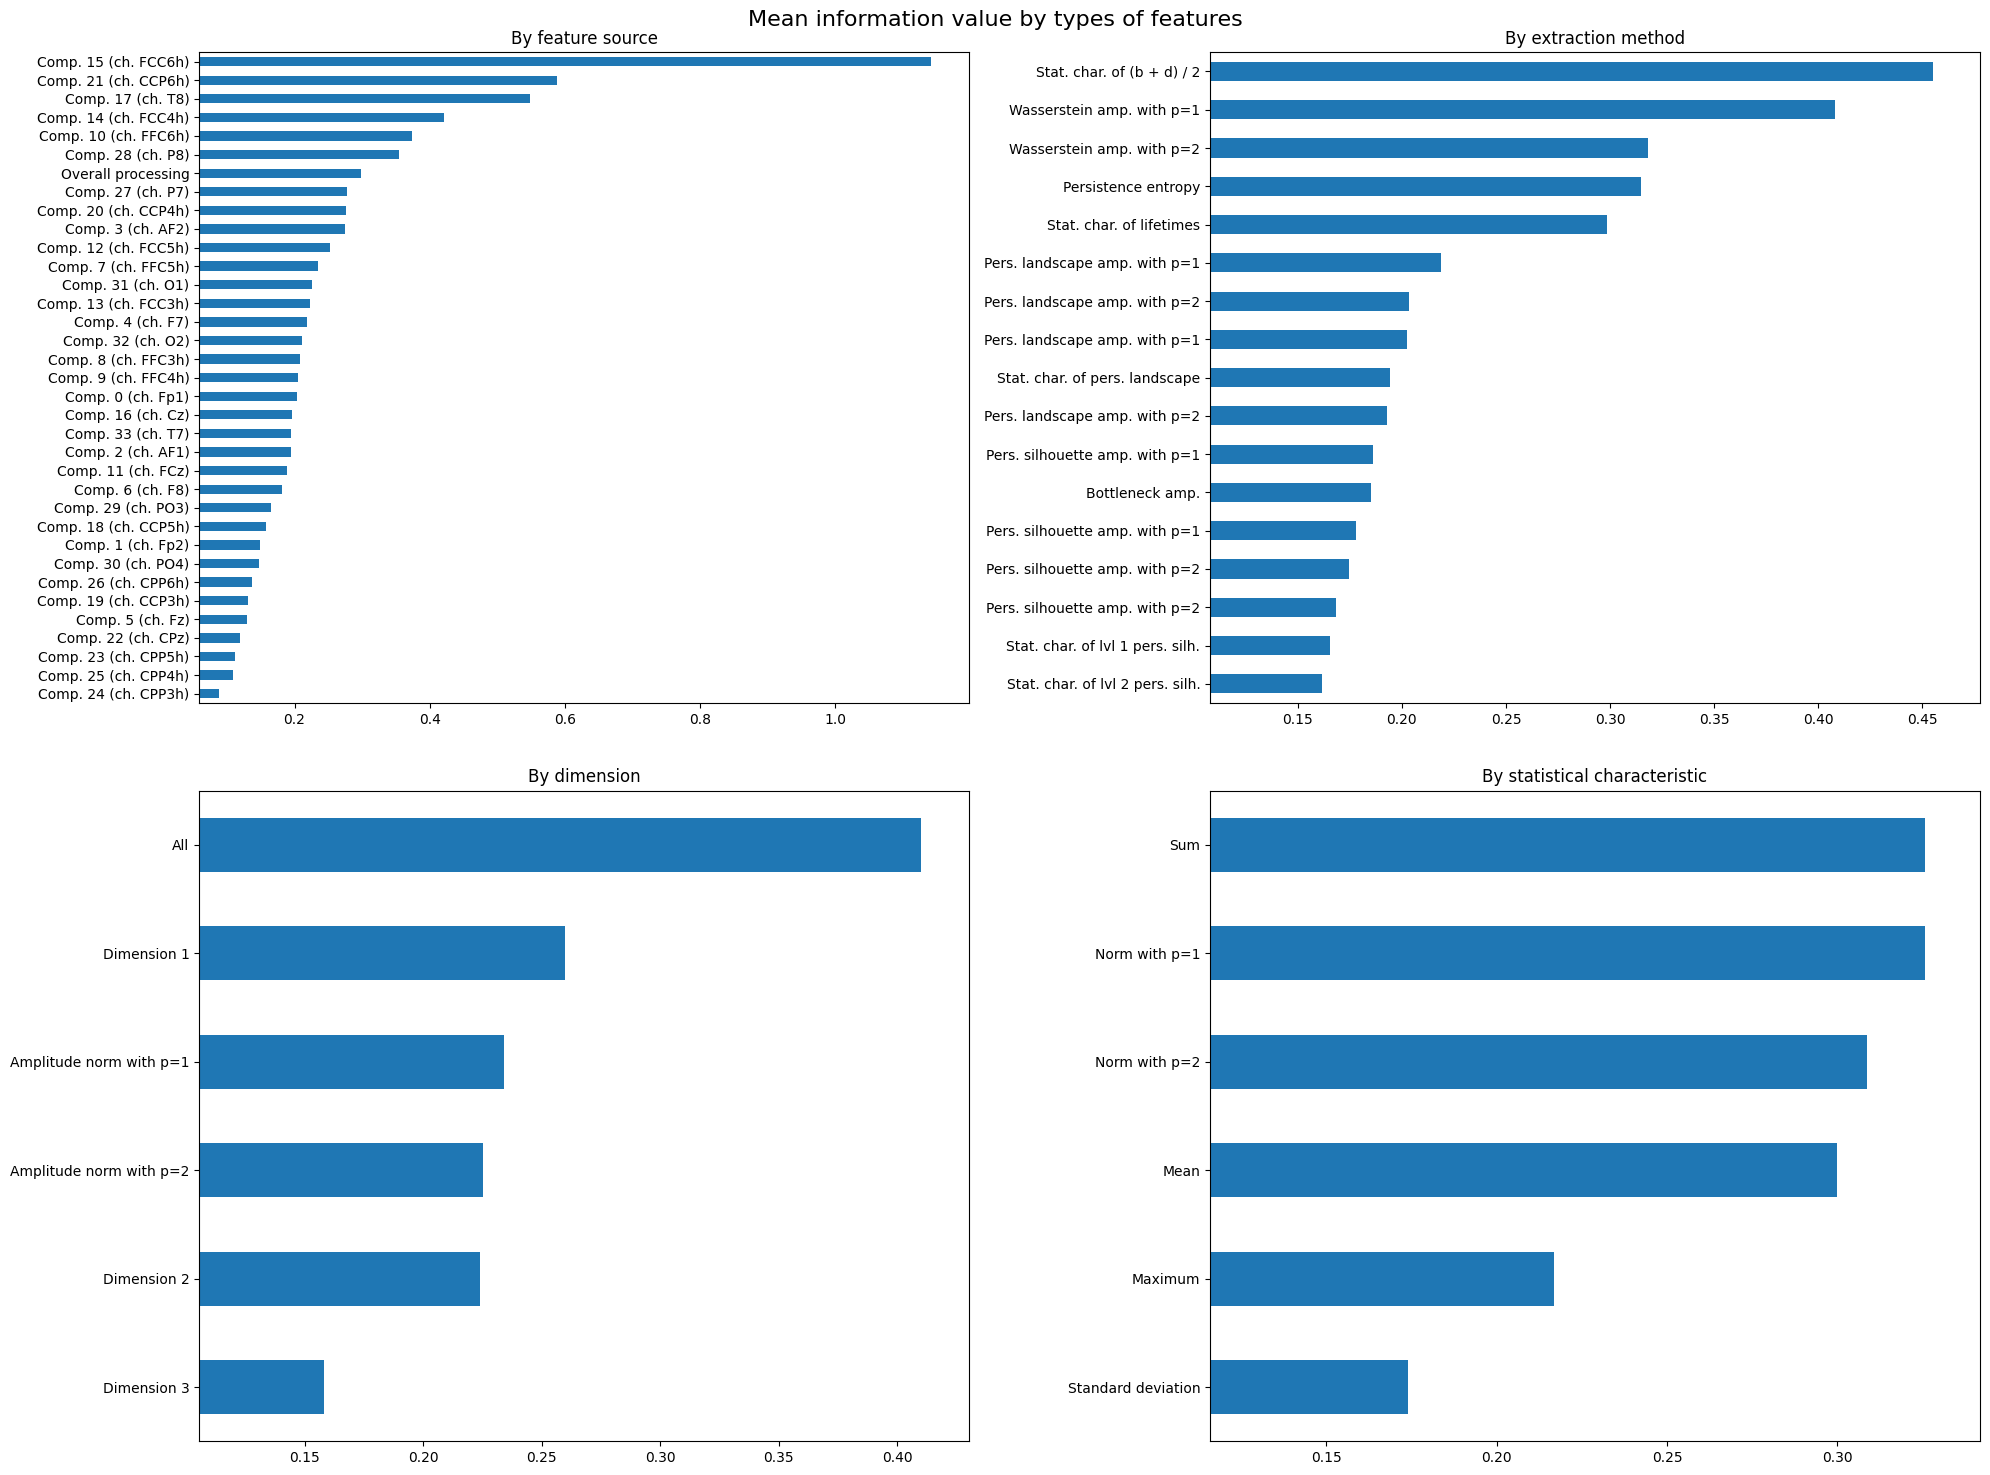

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20, 15))
fig.suptitle('Mean information value by types of features', fontsize = 16)

draw(iv_qsda_scores, 'Source', 'IV', axes.flat[0], SourceRenamer, 'By feature source')
draw(iv_qsda_scores, 'Algorithm', 'IV', axes.flat[1], AlgorithmRenamer, 'By extraction method')
draw(iv_qsda_scores, 'Dimension', 'IV', axes.flat[2], DimensionRenamer, 'By dimension')
draw(iv_qsda_scores, 'Stat', 'IV', axes.flat[3], StatRenamer, 'By statistical characteristic')

fig.tight_layout(h_pad = 3)
fig.savefig(f"{subj}/{exp}/IV/feature_agg_by_iv.svg")
fig.savefig(f"{subj}/{exp}/IV/feature_agg_by_iv.png")

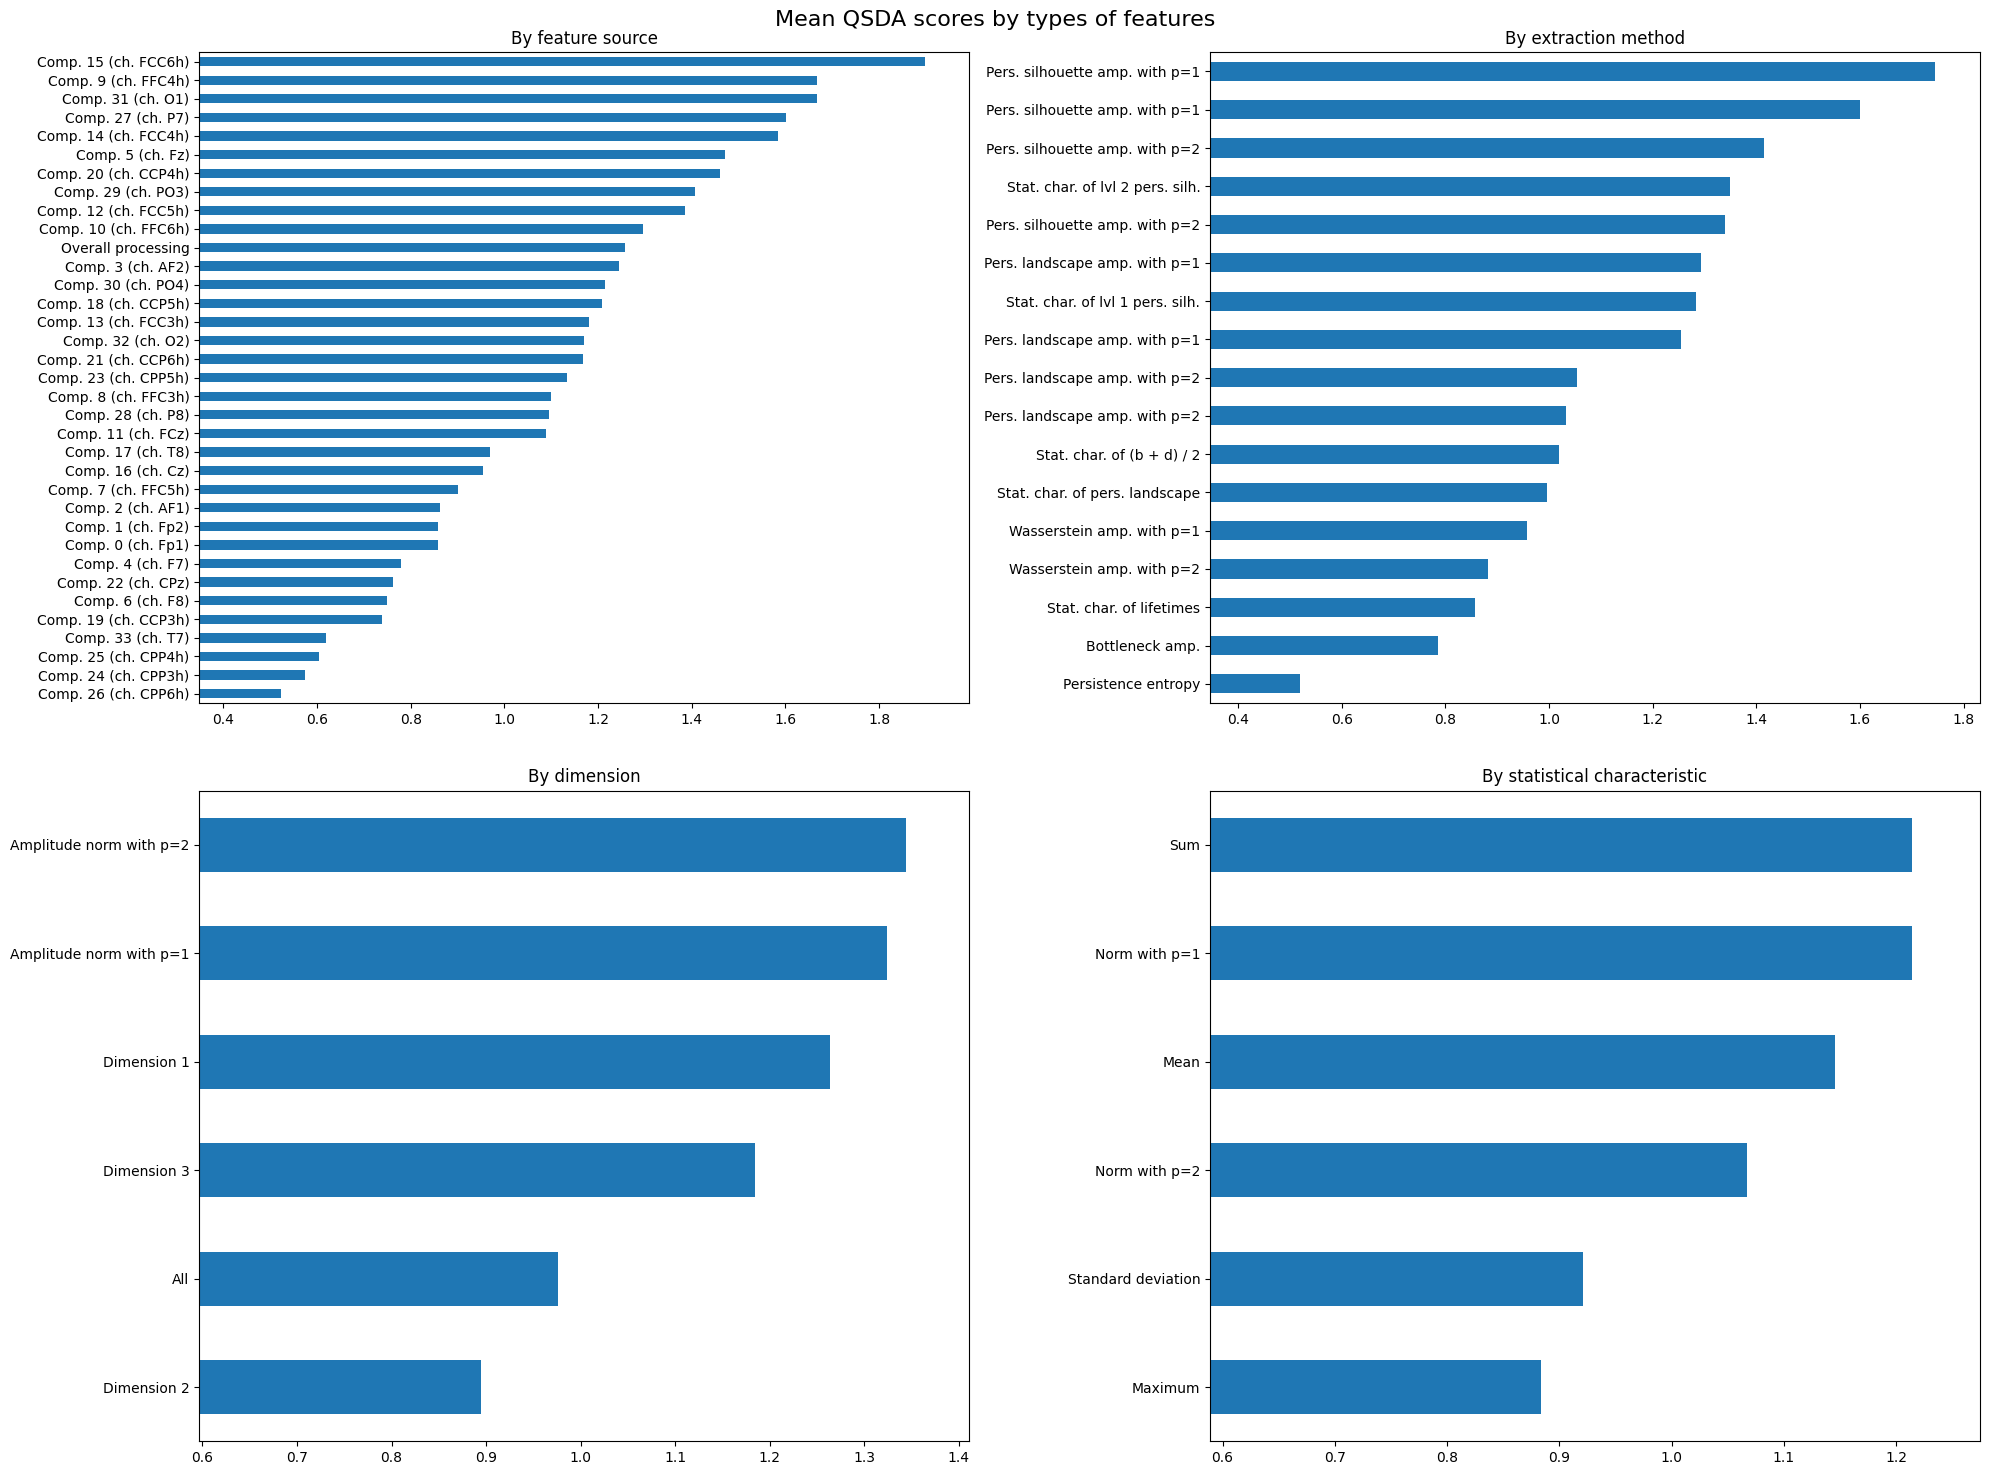

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20, 15))
fig.suptitle('Mean QSDA scores by types of features', fontsize = 16)

draw(iv_qsda_scores, 'Source', 'score', axes.flat[0], SourceRenamer, 'By feature source')
draw(iv_qsda_scores, 'Algorithm', 'score', axes.flat[1], AlgorithmRenamer, 'By extraction method')
draw(iv_qsda_scores, 'Dimension', 'score', axes.flat[2], DimensionRenamer, 'By dimension')
draw(iv_qsda_scores, 'Stat', 'score', axes.flat[3], StatRenamer, 'By statistical characteristic')

fig.tight_layout(h_pad = 3)
fig.savefig(f"{subj}/{exp}/IV/feature_agg_by_qsda.svg")
fig.savefig(f"{subj}/{exp}/IV/feature_agg_by_qsda.png")

In [ ]:
def draw_sources_heatmap(data: pandas.DataFrame, sort_by: str):
    stats = make_stats(data, "Source", sort_by)[["Source", sort_by]]
    stats = stats[stats.apply(lambda row: row['Source'].startswith('channel-'), axis = 1)]

    scores = numpy.zeros(38)
    for _, row in stats.iterrows():
        id = int(row['Source'][row['Source'].find('-') + 1:])
        scores[id] = row[sort_by]

    svg = SDA.analytics.draw_sources_heatmap(scores)
    file = f"{subj}/{exp}/IV/{sort_by}_regions.svg"
    open(file, "w").write(svg)
    return IPython.display.SVG(file)

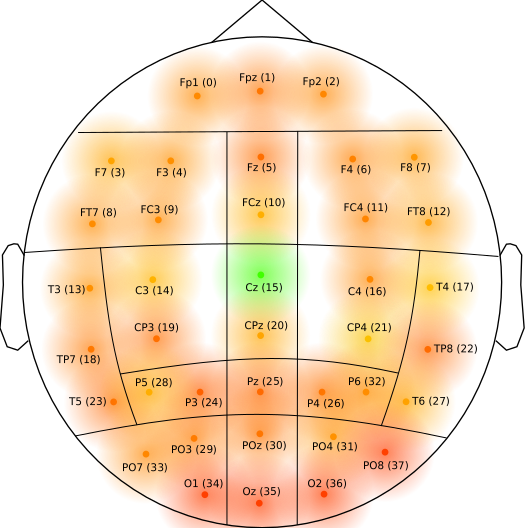

In [ ]:
draw_sources_heatmap(iv_qsda_scores, "IV")

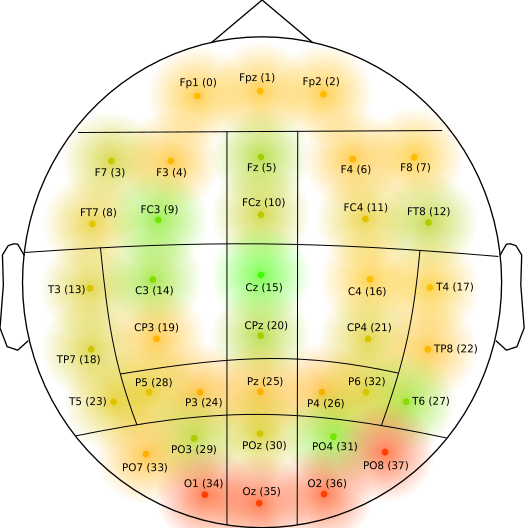

In [ ]:
draw_sources_heatmap(iv_qsda_scores, "score")